# Data transformations


The purpose of this notebook is to visualise the different transformations applied to the raw data so that a decision can be made about the appropriate one

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('..')

import warnings
import tqdm
import pandas as pd

warnings.simplefilter(action="ignore", category=tqdm.TqdmExperimentalWarning)
warnings.simplefilter(action="ignore", category=pd.core.common.SettingWithCopyWarning)

pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 20)
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 20)

%matplotlib notebook
np.set_printoptions(precision=4, linewidth=500, threshold=500, suppress=True)

In [2]:
from model.features import Features

In [3]:
# these are all the possible metrics and transforms

metrics = ['Ozone', 'SO2', 'CO', 'NO2', 'PM25', 'PM10', 'Wind','Pressure', 'Temperature', 'Humidity', 'Fire']
transforms = ['log', 'norm', 'quantile', None]

In [4]:
# load in the feautures

# logFeatures = Features(transform='log')
# normFeatures = Features(transform='norm')
# rawFeatures = Features(transform=None)
# qantileFeatures = Features(transform='quantile')

## 1. Example data

In [5]:
Features.get_data('Ozone', transform='log')

,16_1_10,16_23_101,32_19_6,32_1_2,32_31_1005,32_31_1007,32_31_20,32_31_2002,32_31_2009,32_31_25,...,6_89_3003,6_89_4,6_89_9,6_95_3003,6_95_4,6_95_5,6_97_4,6_99_5,6_99_6,6_9_1
2017-01-01,-0.722635,0.482765,0.507058,0.341799,0.317506,0.575062,0.526476,0.774364,0.706360,0.779239,...,0.545894,-0.747011,-0.722635,-0.576876,-0.149103,-0.322129,-0.674049,-0.907394,-0.824765,-0.066474
2017-01-02,-1.485801,0.405010,0.288337,-0.630338,-0.212315,0.686860,0.336924,0.750071,0.852119,0.764697,...,0.759821,-1.106697,-0.708092,-0.115143,-0.431035,-0.465139,-1.276748,-0.907394,-0.999692,0.220251
2017-01-03,-1.471176,0.443846,0.264044,-0.013013,-0.003345,-0.042181,0.234876,0.327173,0.356341,0.448721,...,0.565394,-0.844183,-0.392117,-0.703217,-0.557376,-0.571927,-0.620587,-0.440786,-0.231733,0.453596
2017-01-04,-0.479621,0.521600,0.045324,0.307755,-0.178272,0.273712,-0.197276,0.225126,0.570269,0.001530,...,0.730653,-0.581751,-0.124810,-1.145533,-0.542833,-0.798948,-1.529512,-0.751803,-0.883101,-0.168604
2017-01-05,-1.291374,0.555644,-0.241483,-0.912270,-0.110267,0.108453,-0.275526,0.468139,0.405010,-0.076224,...,0.813283,-0.231733,0.560519,-0.776179,-1.830862,-0.646026,-1.860030,-0.941438,-1.058028,-1.485801
2017-01-06,-1.524637,0.628523,0.239751,-0.479621,-0.567126,-0.445661,-1.150408,0.317506,-0.465079,-0.785846,...,0.876412,-0.936563,0.040449,-0.265776,-0.528290,-0.782707,-1.179576,-1.432340,-1.369128,-1.155283
2017-01-07,-0.683799,0.813283,0.147371,-0.304695,-0.970523,-0.644880,-1.019192,-0.319237,-0.013013,-0.003345,...,0.312630,-1.568431,-0.879218,-1.126115,-1.121240,-0.838982,-0.839308,-1.286499,-0.990024,-0.469954
2017-01-08,-0.435910,0.438971,-0.708092,-0.547708,-0.994899,-0.523415,-0.489372,-0.013013,-0.008137,-0.022763,...,0.561428,-0.921937,-0.970523,-0.460203,-0.606045,-0.669133,-0.606045,-1.009442,-1.062903,-0.474746
2017-01-09,-0.732385,0.667442,0.959041,0.706360,0.264044,0.652899,0.784114,0.837576,0.900787,0.944498,...,0.818158,-0.314362,-0.324113,0.127953,0.220251,-0.399057,0.089035,-0.406742,-0.260901,0.453596
2017-01-10,-0.853933,0.531351,0.618855,0.555644,0.205708,0.579937,0.604230,0.500365,0.910455,0.740321,...,0.871619,-0.396992,-0.314362,0.283462,0.385510,-0.033097,0.195958,-0.683799,-0.406742,0.764697


## 2. Visualising the time series

We now plot the time series at a single location for each metric and each processing type 

<IPython.core.display.Javascript object>


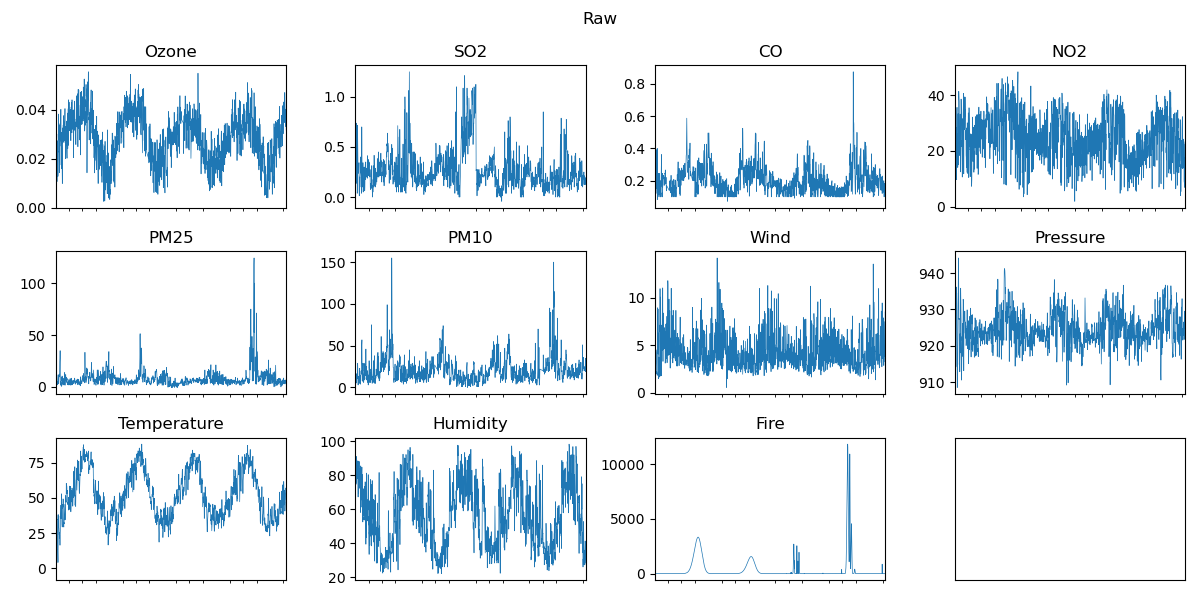

<IPython.core.display.Javascript object>


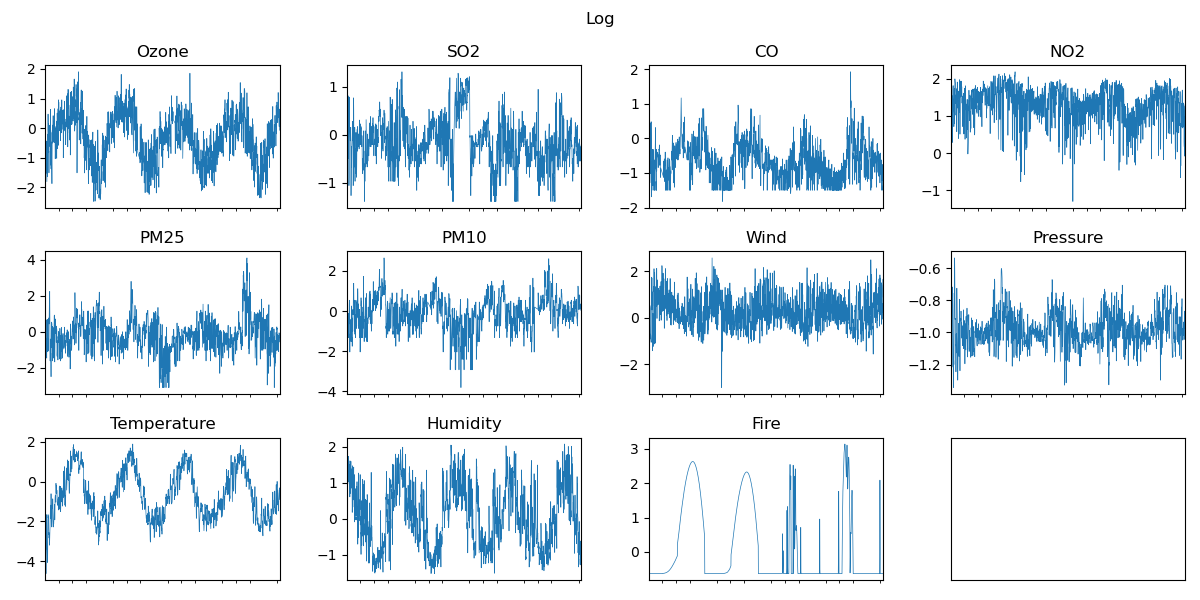

<IPython.core.display.Javascript object>


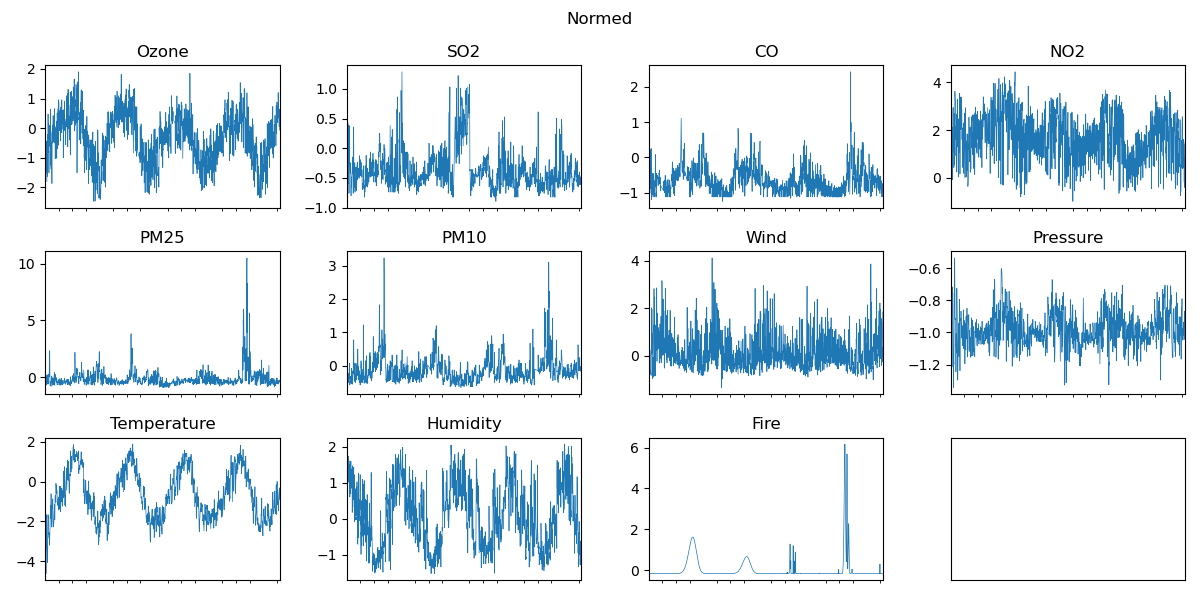

<IPython.core.display.Javascript object>


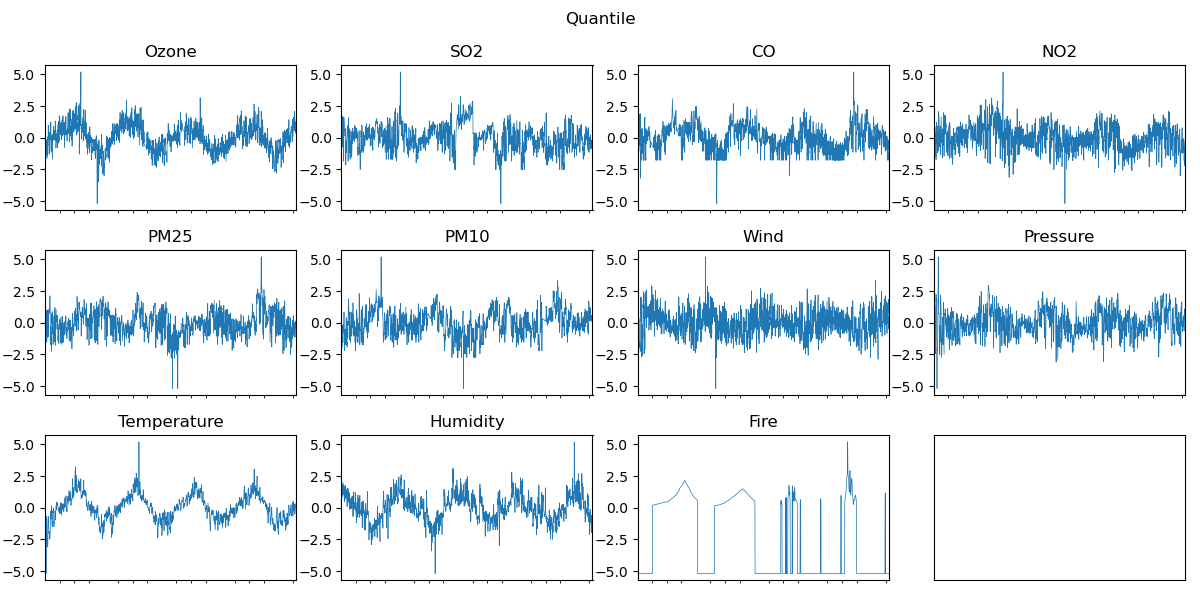

In [6]:
for transformation, transform in zip(['Raw', 'Log', 'Normed', 'Quantile'], [None, 'log', 'norm', 'quantile']):

    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))

    for metric, ax in zip(metrics, axes.flatten()):

        data = Features.get_data(metric, transform=transform)
        
        data.iloc[:, 0].plot(ax=ax, lw=0.5)

        ax.set_title(metric)
        ax.set_xticks([])

    axes[-1, -1].set_xticks([])
    axes[-1, -1].set_yticks([])
    
    plt.suptitle(transformation)
    plt.tight_layout()
    
    print('\n\n\n\n\n\n')

## 3. Visualising the histograms

<IPython.core.display.Javascript object>


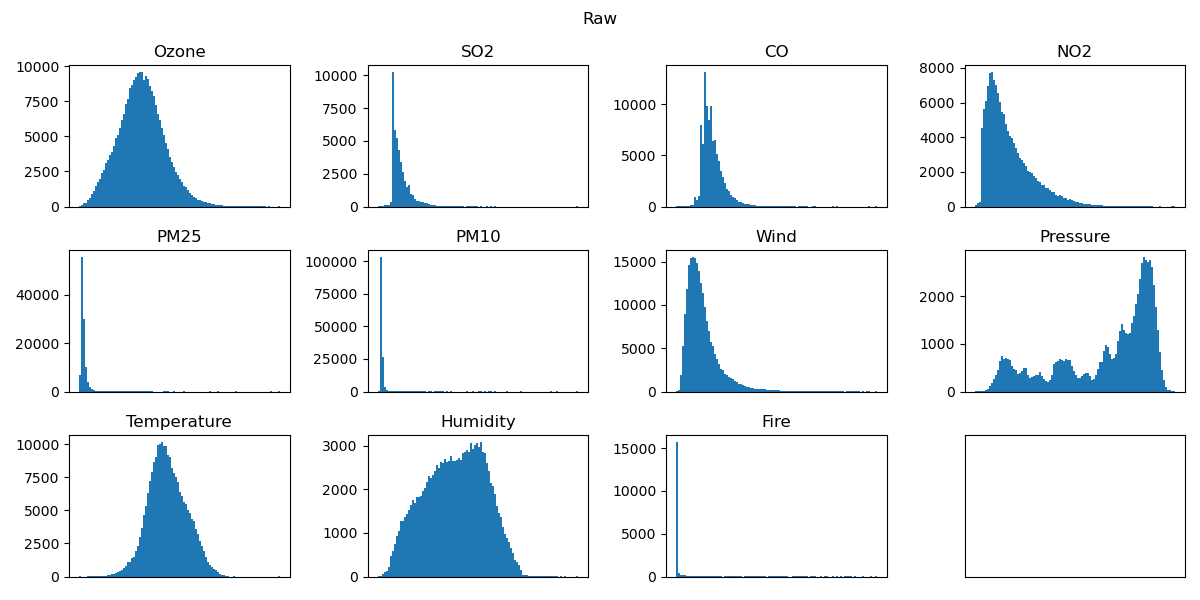

<IPython.core.display.Javascript object>


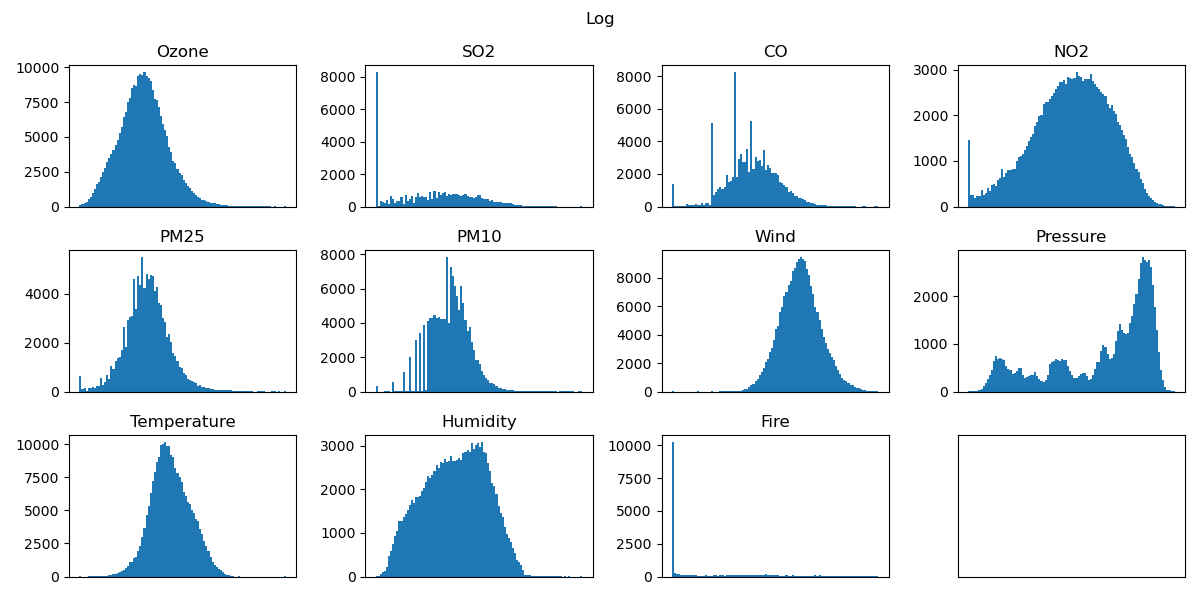

<IPython.core.display.Javascript object>


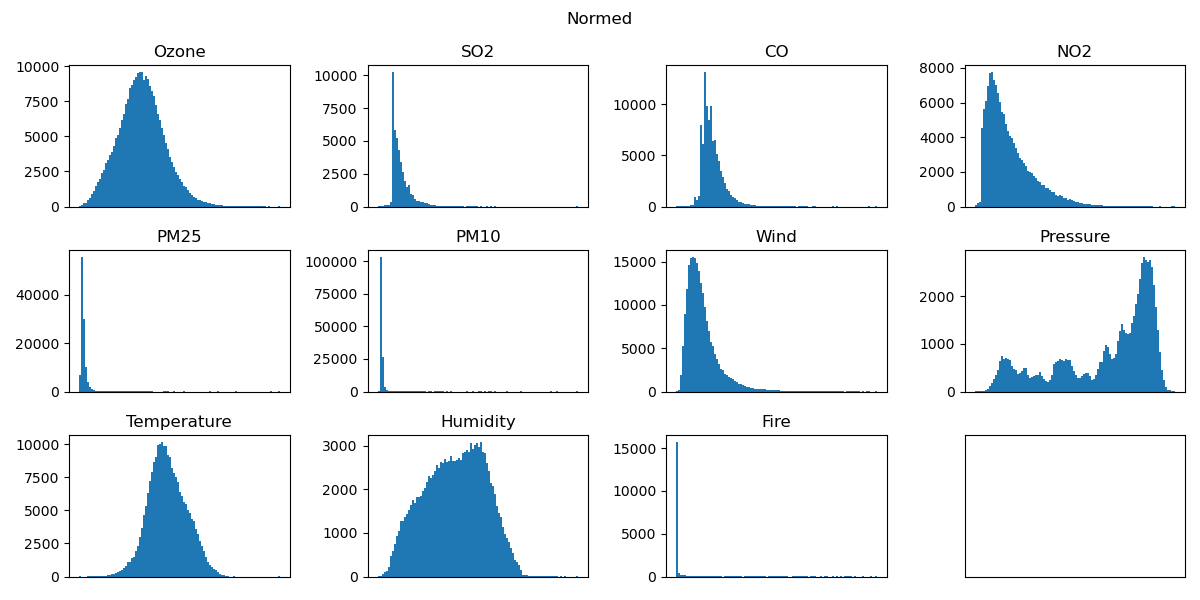

<IPython.core.display.Javascript object>


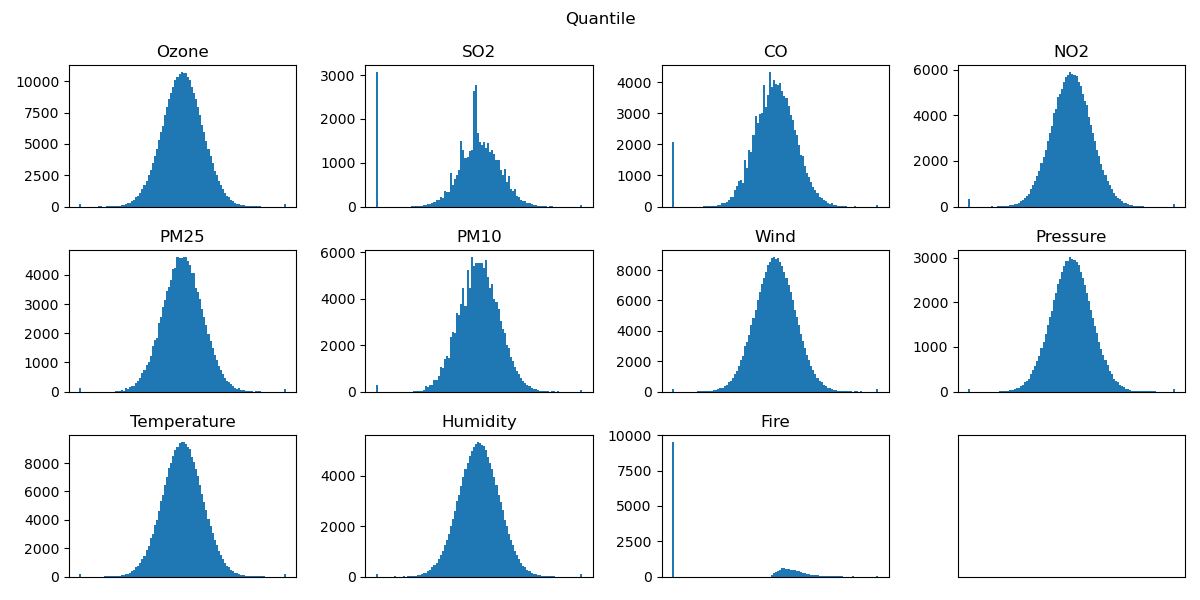

In [7]:
for transformation, transform in zip(['Raw', 'Log', 'Normed', 'Quantile'], [None, 'log', 'norm', 'quantile']):

    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))

    for metric, ax in zip(metrics, axes.flatten()):

        data = Features.get_data(metric, transform=transform)
        
        ax.hist(data.values.flatten(), bins=100)

        ax.set_title(metric)
        ax.set_xticks([])

    axes[-1, -1].set_xticks([])
    axes[-1, -1].set_yticks([])
    
    plt.suptitle(transformation)
    plt.tight_layout()
    
    print('\n\n\n\n\n\n')